In [1]:
!pip install dash dash-core-components dash-html-components plotly

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.5/7.5 MB 21.4 MB/s eta 0:00:00


In [2]:
!pip install dash-bootstrap-components

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 222.5/222.5 kB 4.8 MB/s eta 0:00:00


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objs as go
import dash
from dash import dcc, html
import dash_bootstrap_components as dbc


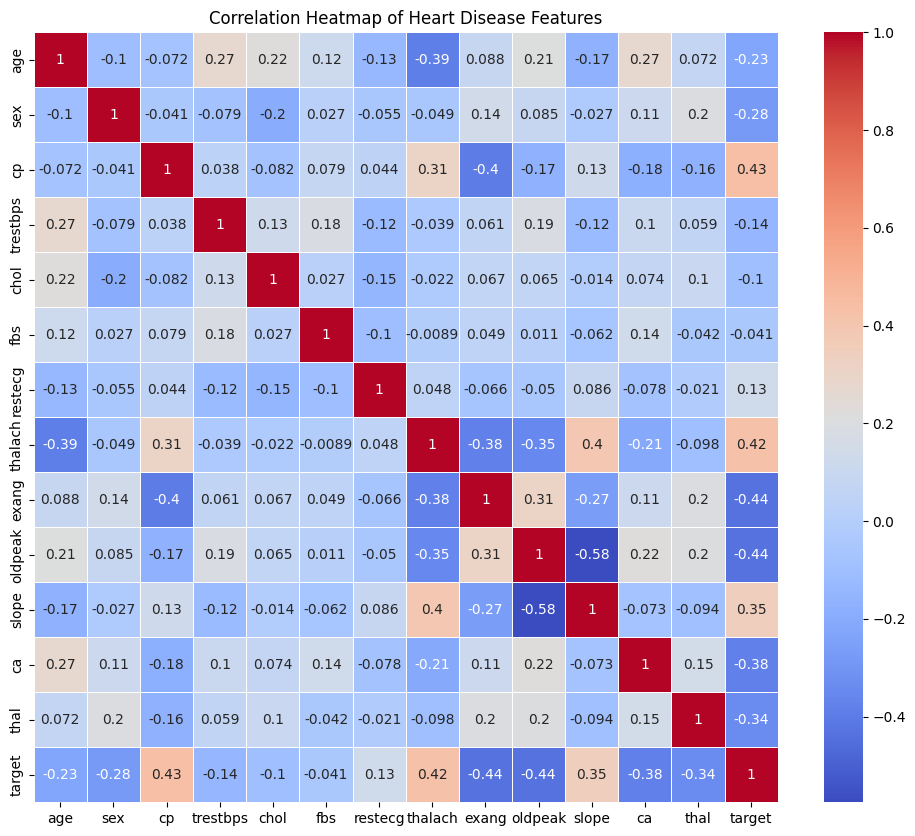

Correlations with heart disease:
target      1.000000
cp          0.434854
thalach     0.422895
slope       0.345512
restecg     0.134468
fbs        -0.041164
chol       -0.099966
trestbps   -0.138772
age        -0.229324
sex        -0.279501
thal       -0.337838
ca         -0.382085
exang      -0.438029
oldpeak    -0.438441
Name: target, dtype: float64


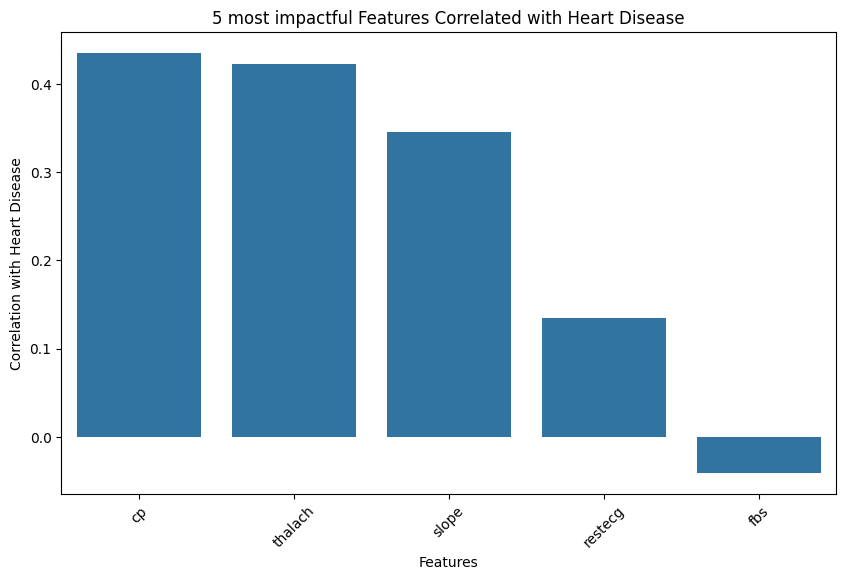

In [5]:
df = pd.read_csv('Heart Disease data.csv')
corr_matrix = df.corr()


target_correlations = corr_matrix['target'].sort_values(ascending=False)


plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Heart Disease Features')
plt.show()
plt.close()

print("Correlations with heart disease:")
print(target_correlations)


top_features = target_correlations.index[1:6]
plt.figure(figsize=(10, 6))
sns.barplot(x=top_features, y=target_correlations[top_features])
plt.title('5 most impactful Features Correlated with Heart Disease')
plt.xlabel('Features')
plt.ylabel('Correlation with Heart Disease')
plt.xticks(rotation=45)
plt.show()
plt.close()



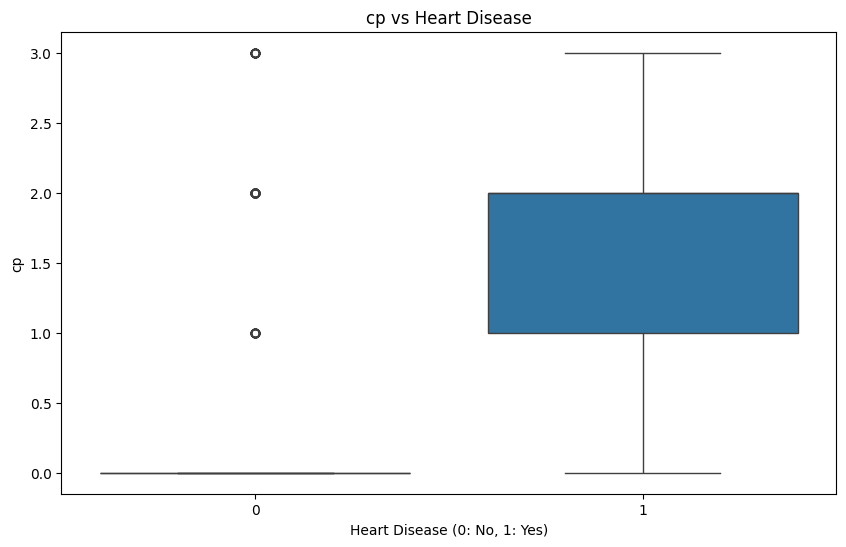

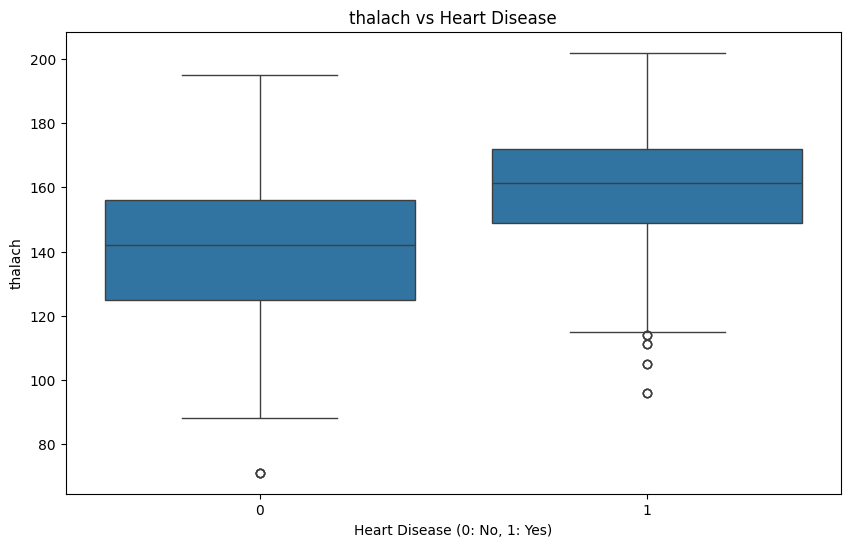

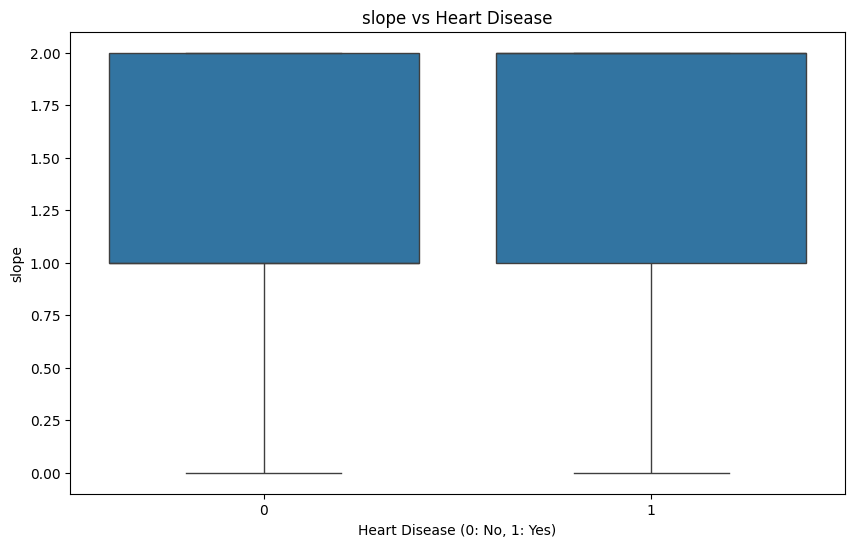

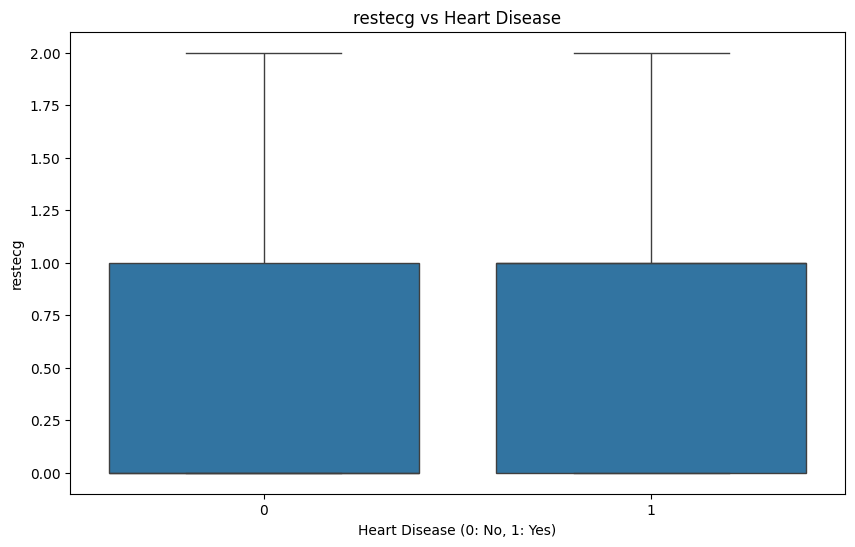

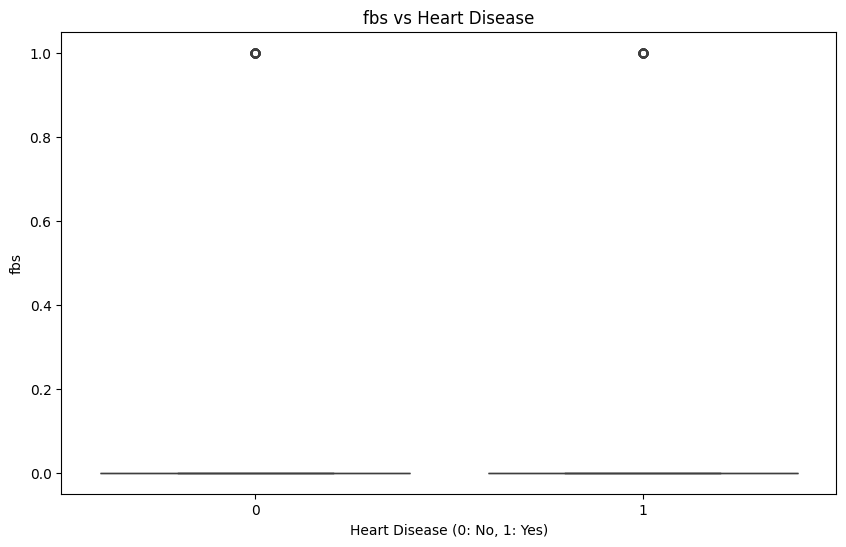

Individual graphs for top 5 features have been saved.


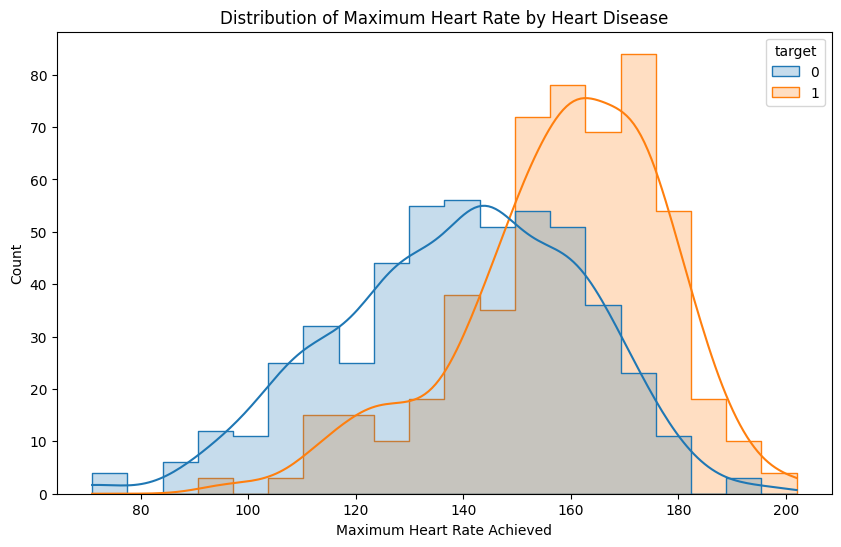

In [6]:
top_features = ['cp', 'thalach', 'slope', 'restecg', 'fbs']


for feature in top_features:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='target', y=feature, data=df)
    plt.title(f'{feature} vs Heart Disease')
    plt.xlabel('Heart Disease (0: No, 1: Yes)')
    plt.ylabel(feature)
    plt.show(f'{feature}_vs_heart_disease')
    plt.close()

print("Individual graphs for top 5 features have been saved.")
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='thalach', hue='target', kde=True, element='step')
plt.title('Distribution of Maximum Heart Rate by Heart Disease')
plt.xlabel('Maximum Heart Rate Achieved')
plt.ylabel('Count')
plt.show()
plt.close()



<IPython.core.display.Javascript object>

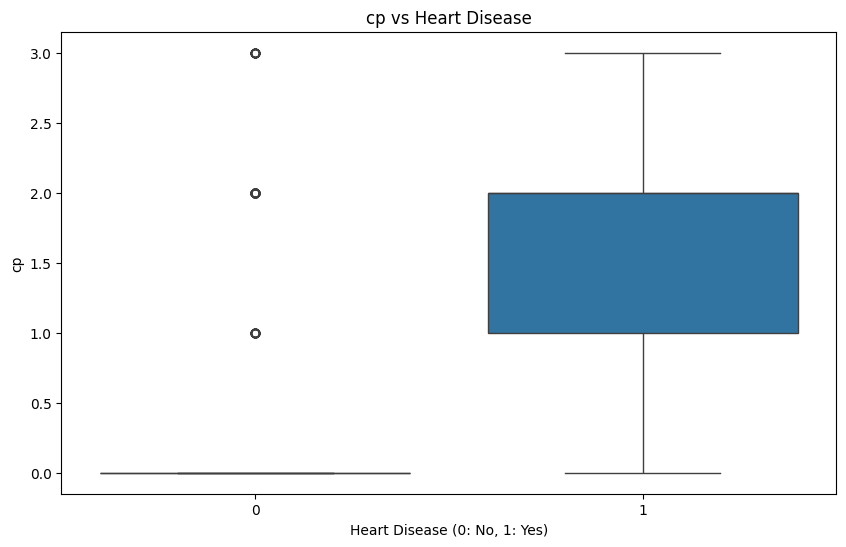

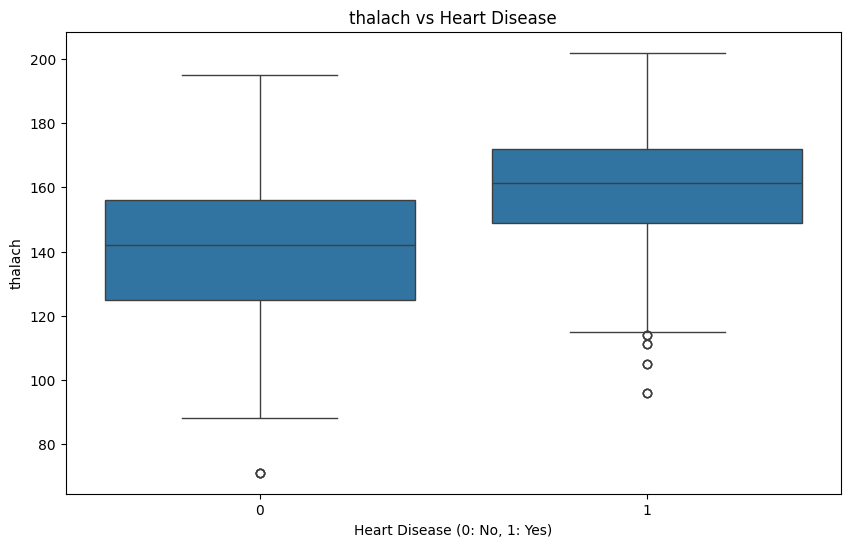

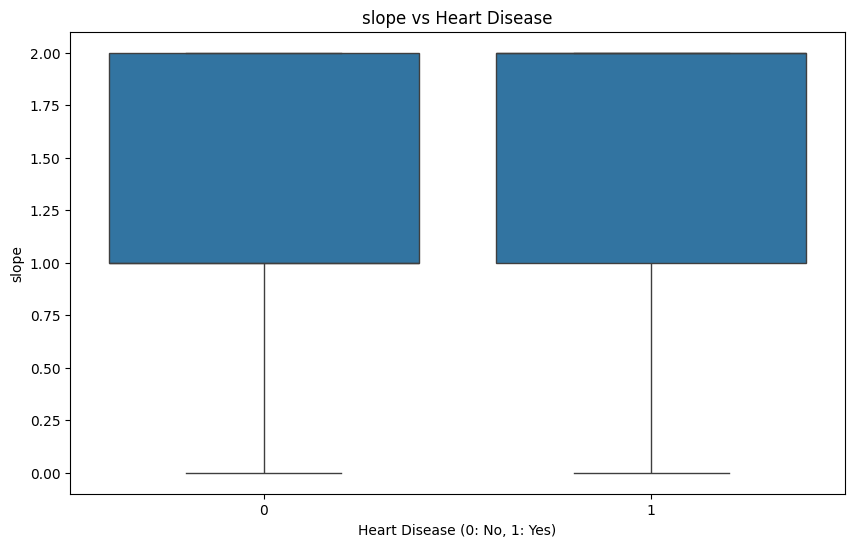

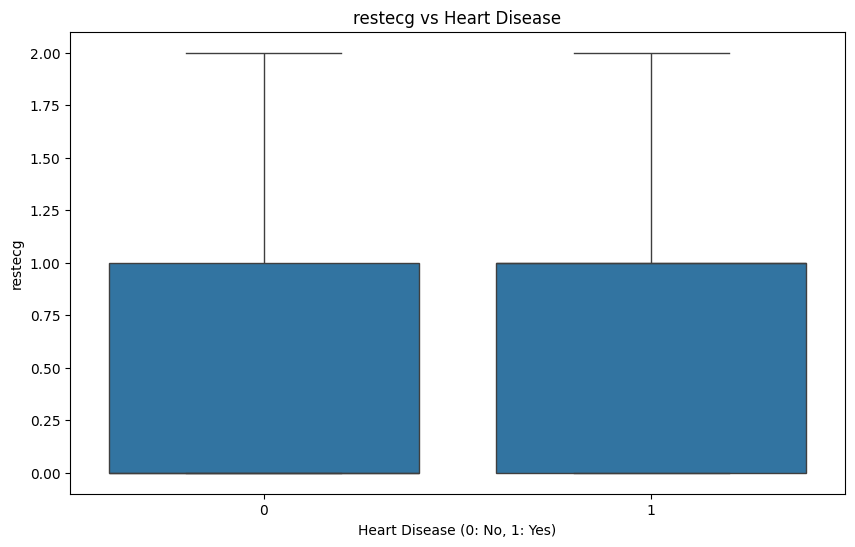

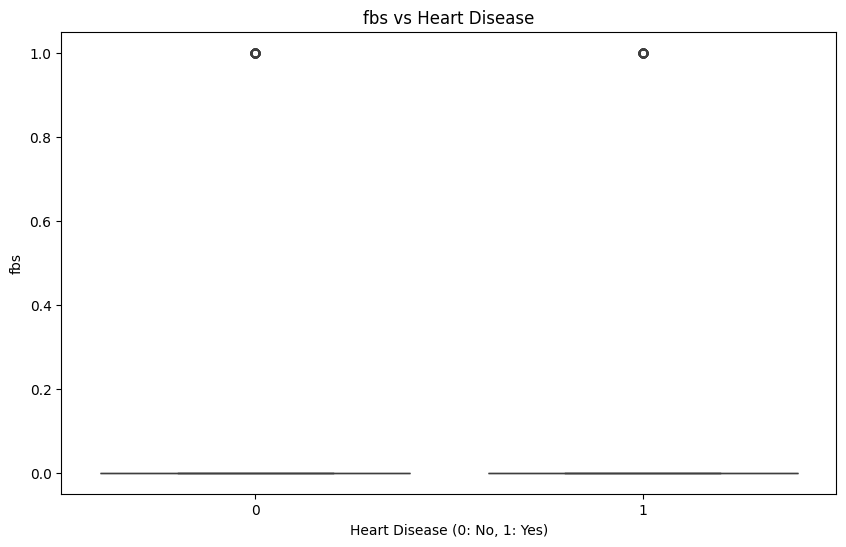

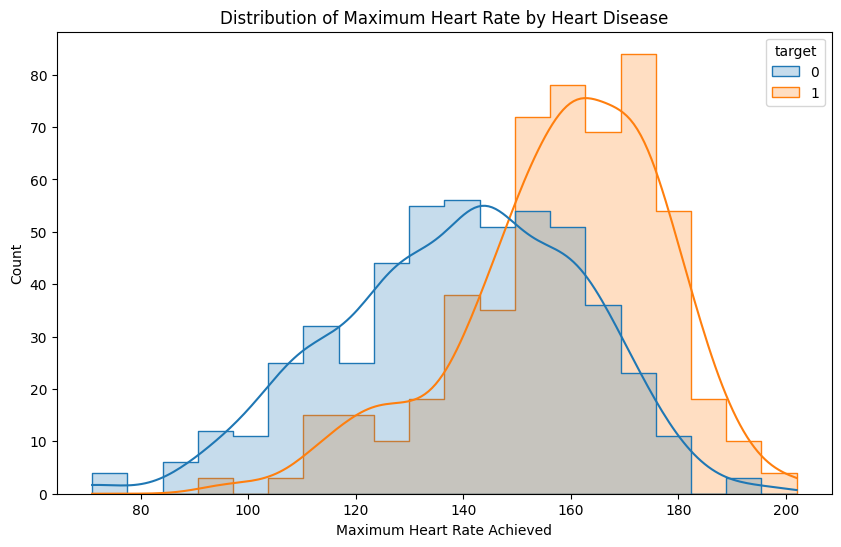

In [7]:





app = dash.Dash(__name__, external_stylesheets=[dbc.themes.BOOTSTRAP])

top_features = ['cp', 'thalach', 'slope', 'restecg', 'fbs']

graphs = []

for feature in top_features:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='target', y=feature, data=df)
    plt.title(f'{feature} vs Heart Disease')
    plt.xlabel('Heart Disease (0: No, 1: Yes)')
    plt.ylabel(feature)


    fig = px.box(df, x='target', y=feature, title=f'{feature} vs Heart Disease')

    graphs.append(dcc.Graph(figure=fig))


plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='thalach', hue='target', kde=True, element='step')
plt.title('Distribution of Maximum Heart Rate by Heart Disease')
plt.xlabel('Maximum Heart Rate Achieved')
plt.ylabel('Count')


fig_hist = px.histogram(df, x='thalach', color='target', marginal='rug', hover_data=df.columns)

graphs.append(dcc.Graph(figure=fig_hist))

app.layout = dbc.Container([
    dbc.Row(dbc.Col(html.H1("Heart Disease Data Analysis"))),
    dbc.Row([dbc.Col(graph, width=6) for graph in graphs[:-1]]),  # Display the boxplots in two columns
    dbc.Row(dbc.Col(graphs[-1]))  # Display the histogram
], fluid=True)

if __name__ == '__main__':
    app.run_server(debug=True)


In [ ]:
!sudo apt-get install texlive-xetex texlive-fonts-recommended texlive-plain-generic

In [22]:
!jupyter nbconvert --to pdf /content/Heart_disease_code.ipynb

[NbConvertApp] WARNING | pattern '/content/Heart_disease_code.ipynb' matched no files
This application is used to convert notebook files (*.ipynb)
        to various other formats.


Options
The options below are convenience aliases to configurable class-options,
as listed in the "Equivalent to" description-line of the aliases.
To see all configurable class-options for some <cmd>, use:
    <cmd> --help-all

--debug
    set log level to logging.DEBUG (maximize logging output)
    Equivalent to: [--Application.log_level=10]
--show-config
    Show the application's configuration (human-readable format)
    Equivalent to: [--Application.show_config=True]
--show-config-json
    Show the application's configuration (json format)
    Equivalent to: [--Application.show_config_json=True]
--generate-config
    generate default config file
    Equivalent to: [--JupyterApp.generate_config=True]
-y
    Answer yes to any questions instead of prompting.
    Equivalent to: [--JupyterApp.answer_yes=Tru